In [3]:
import pandas as pd, numpy as np

In [4]:
from collections import defaultdict

In [6]:
import importlib
import algo.feature.jitter.research
importlib.reload(algo.feature.jitter.research)

<module 'algo.feature.jitter.research' from '/Users/junlim/projects/jitter_recovery/algo/feature/jitter/research.py'>

In [269]:
import algo.feature.simple_jitter.calculate
import algo.feature.simple_jitter.research
importlib.reload(algo.feature.simple_jitter.calculate)
importlib.reload(algo.feature.simple_jitter.research)
simple_feature_param = algo.feature.simple_jitter.calculate.SimpleJitterFeatureParam(30)

In [161]:
df20 = pd.read_parquet("okx_raw_1minutes_20.parquet")
df21 = pd.read_parquet("okx_raw_1minutes_21.parquet")
df24 = pd.read_parquet("okx_raw_1minutes_24.parquet")
df25 = pd.read_parquet("okx_raw_1minutes_25.parquet")
df26 = pd.read_parquet("okx_raw_1minutes_26.parquet")
df27 = pd.read_parquet("okx_raw_1minutes_27.parquet")

In [11]:
import market_data
import market_data.ingest.bq.common
import market_data.ingest.bq.candle
dataset_mode = market_data.ingest.bq.common.DATASET_MODE.OKX
export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE
t_id = market_data.ingest.bq.common.get_full_table_id(dataset_mode, export_mode)
date_str_from='2024-11-25'
date_str_to='2024-11-26'
df = market_data.ingest.bq.candle.fetch_minute_candle(t_id, aggregation_mode=market_data.ingest.bq.common.AGGREGATION_MODE.TAKE_LASTEST, date_str_from=date_str_from, date_str_to=date_str_to)


    WITH LATEST AS (
    SELECT timestamp, symbol, max(ingestion_timestamp) AS max_ingestion_timestamp
    FROM `trading-290017.market_data_okx.by_minute` 
    WHERE TRUE
    AND timestamp >= "2024-11-25T00:00:00-0500"
    AND timestamp < "2024-11-26T00:00:00-0500"
    GROUP BY timestamp, symbol
    )

    SELECT T.timestamp, T.symbol, open, high, low, close, volume
    FROM `trading-290017.market_data_okx.by_minute` AS T JOIN 
        LATEST ON T.timestamp = LATEST.timestamp AND T.symbol = LATEST.symbol 
        AND IFNULL(T.ingestion_timestamp, PARSE_TIMESTAMP("%c", "Thu Dec 25 07:30:00 2008")) = IFNULL(LATEST.max_ingestion_timestamp, PARSE_TIMESTAMP("%c", "Thu Dec 25 07:30:00 2008"))
    WHERE TRUE
    AND T.timestamp >= "2024-11-25T00:00:00-0500"
    AND T.timestamp < "2024-11-26T00:00:00-0500"
    ORDER BY T.timestamp ASC



In [324]:
df12 = market_data.ingest.bq.candle.fetch_minute_candle(t_id, aggregation_mode=market_data.ingest.bq.common.AGGREGATION_MODE.TAKE_LASTEST, date_str_from='2024-11-12', date_str_to='2024-11-13')
df13 = market_data.ingest.bq.candle.fetch_minute_candle(t_id, aggregation_mode=market_data.ingest.bq.common.AGGREGATION_MODE.TAKE_LASTEST, date_str_from='2024-11-13', date_str_to='2024-11-14')


    WITH LATEST AS (
    SELECT timestamp, symbol, max(ingestion_timestamp) AS max_ingestion_timestamp
    FROM `trading-290017.market_data_okx.by_minute` 
    WHERE TRUE
    AND timestamp >= "2024-11-12T00:00:00-0500"
    AND timestamp < "2024-11-13T00:00:00-0500"
    GROUP BY timestamp, symbol
    )

    SELECT T.timestamp, T.symbol, open, high, low, close, volume
    FROM `trading-290017.market_data_okx.by_minute` AS T JOIN 
        LATEST ON T.timestamp = LATEST.timestamp AND T.symbol = LATEST.symbol 
        AND IFNULL(T.ingestion_timestamp, PARSE_TIMESTAMP("%c", "Thu Dec 25 07:30:00 2008")) = IFNULL(LATEST.max_ingestion_timestamp, PARSE_TIMESTAMP("%c", "Thu Dec 25 07:30:00 2008"))
    WHERE TRUE
    AND T.timestamp >= "2024-11-12T00:00:00-0500"
    AND T.timestamp < "2024-11-13T00:00:00-0500"
    ORDER BY T.timestamp ASC


    WITH LATEST AS (
    SELECT timestamp, symbol, max(ingestion_timestamp) AS max_ingestion_timestamp
    FROM `trading-290017.market_data_okx.by_minute` 
  

In [325]:
df12.to_parquet("okx_raw_1minutes_26.parquet")
df13.to_parquet("okx_raw_1minutes_27.parquet")

In [198]:
importlib.reload(algo.feature.simple_jitter.calculate)
importlib.reload(algo.feature.simple_jitter.research)
dfst_simple_feature20 = algo.feature.simple_jitter.research.get_dfst_feature(df20.reset_index(), simple_feature_param)
dfst_simple_feature24 = algo.feature.simple_jitter.research.get_dfst_feature(df24.reset_index(), simple_feature_param)
dfst_simple_feature25 = algo.feature.simple_jitter.research.get_dfst_feature(df25.reset_index(), simple_feature_param)
dfst_simple_feature26 = algo.feature.simple_jitter.research.get_dfst_feature(df26.reset_index(), simple_feature_param)
dfst_simple_feature27 = algo.feature.simple_jitter.research.get_dfst_feature(df27.reset_index(), simple_feature_param)

all_symbols: 201
0 symbol: HBAR-USDT-SWAP (feature)
1 symbol: FTM-USDT-SWAP (feature)
2 symbol: X-USDT-SWAP (feature)
3 symbol: MOODENG-USDT-SWAP (feature)
4 symbol: AR-USDT-SWAP (feature)
5 symbol: SCR-USDT-SWAP (feature)
6 symbol: AVAX-USDT-SWAP (feature)
7 symbol: BICO-USDT-SWAP (feature)
8 symbol: CRO-USDT-SWAP (feature)
9 symbol: PNUT-USDT-SWAP (feature)
10 symbol: MEW-USDT-SWAP (feature)
11 symbol: LQTY-USDT-SWAP (feature)
12 symbol: ARB-USDT-SWAP (feature)
13 symbol: UNI-USDT-SWAP (feature)
14 symbol: ZRX-USDT-SWAP (feature)
15 symbol: ORDI-USDT-SWAP (feature)
16 symbol: GRASS-USDT-SWAP (feature)
17 symbol: BSV-USDT-SWAP (feature)
18 symbol: LINK-USDT-SWAP (feature)
19 symbol: RENDER-USDT-SWAP (feature)
20 symbol: ETH-USDT-SWAP (feature)
21 symbol: MEME-USDT-SWAP (feature)
22 symbol: LTC-USDT-SWAP (feature)
23 symbol: DOT-USDT-SWAP (feature)
24 symbol: GMT-USDT-SWAP (feature)
25 symbol: SUI-USDT-SWAP (feature)
26 symbol: CTC-USDT-SWAP (feature)
27 symbol: MINA-USDT-SWAP (feature

In [279]:
dfst_simple_feature26 = algo.feature.simple_jitter.research.get_dfst_feature(df26.reset_index(), simple_feature_param)

all_symbols: 208
0 symbol: PUFFER-USDT-SWAP (feature)
1 symbol: TON-USDT-SWAP (feature)
2 symbol: XTZ-USDT-SWAP (feature)
3 symbol: COMP-USDT-SWAP (feature)
4 symbol: AEVO-USDT-SWAP (feature)
5 symbol: VELO-USDT-SWAP (feature)
6 symbol: MORPHO-USDT-SWAP (feature)
7 symbol: TIA-USDT-SWAP (feature)
8 symbol: QTUM-USDT-SWAP (feature)
9 symbol: INJ-USDT-SWAP (feature)
10 symbol: ICP-USDT-SWAP (feature)
11 symbol: GRASS-USDT-SWAP (feature)
12 symbol: BTC-USDT-SWAP (feature)
13 symbol: ENS-USDT-SWAP (feature)
14 symbol: STX-USDT-SWAP (feature)
15 symbol: DOGS-USDT-SWAP (feature)
16 symbol: LDO-USDT-SWAP (feature)
17 symbol: ONDO-USDT-SWAP (feature)
18 symbol: CHZ-USDT-SWAP (feature)
19 symbol: OL-USDT-SWAP (feature)
20 symbol: CRV-USDT-SWAP (feature)
21 symbol: SATS-USDT-SWAP (feature)
22 symbol: MEW-USDT-SWAP (feature)
23 symbol: ID-USDT-SWAP (feature)
24 symbol: ZETA-USDT-SWAP (feature)
25 symbol: CRO-USDT-SWAP (feature)
26 symbol: JTO-USDT-SWAP (feature)
27 symbol: DEGEN-USDT-SWAP (featur

In [208]:
dfst_simple_feature20.columns

Index(['open', 'high', 'low', 'close', 'volume', 'ingestion_timestamp',
       'value', 'ch', 'ch_max', 'ch_min', 'avg_v_before_max_ch',
       'avg_v_before_min_ch', 'v_ch_max_is_from', 'v_ch_min_is_from',
       'v_ch_max_is_to', 'v_ch_min_is_to', 'distance_max_ch',
       'distance_min_ch', 'expected_v'],
      dtype='object')

In [318]:
import market_data.ingest.bq.common
import algo.cache

dfst_simple_feature12 = algo.cache.read_df(
    label = algo.feature.simple_jitter.research.get_feature_label_for_caching(simple_feature_param),
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.OKX,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE,
    date_str_from='2024-11-12', 
    date_str_to='2024-11-13')

dfst_simple_feature13 = algo.cache.read_df(
    label = algo.feature.simple_jitter.research.get_feature_label_for_caching(simple_feature_param),
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.OKX,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE,
    date_str_from='2024-11-13', 
    date_str_to='2024-11-14')

In [339]:
import market_data.ingest.bq.common
import algo.cache

dfst_simple_feature = algo.cache.read_df(
    label = algo.feature.simple_jitter.research.get_feature_label_for_caching(simple_feature_param),
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.OKX,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE,
    date_str_from='2024-11-01', 
    date_str_to='2024-11-20')

In [340]:
dfst_simple_feature.columns

Index(['index', 'open', 'high', 'low', 'close', 'volume', 'value', 'ch',
       'ch_max', 'ch_min', 'avg_v_before_max_ch', 'avg_v_before_min_ch',
       'v_ch_max_is_from', 'v_ch_min_is_from', 'v_ch_max_is_to',
       'v_ch_min_is_to', 'distance_max_ch', 'distance_min_ch', 'expected_v'],
      dtype='object')

In [309]:
import importlib
import algo.alpha.jitter_simple_reversal.calculate
import algo.alpha.jitter_simple_reversal.research
importlib.reload(algo.alpha.jitter_simple_reversal.calculate)
importlib.reload(algo.alpha.jitter_simple_reversal.research)

trading_param_simple_reversal = algo.alpha.jitter_simple_reversal.calculate.JitterSimpleReversalTradingParam(
        simple_feature_param,
        jump_threshold=0.15, drop_from_jump_threshold=-0.02)

In [245]:
importlib.reload(algo.alpha.jitter_simple_reversal.calculate)
importlib.reload(algo.alpha.jitter_simple_reversal.research)
df_simple_reversal_trading20 = algo.alpha.jitter_simple_reversal.research.get_dfst_trading(dfst_simple_feature20, trading_param_simple_reversal)
df_simple_reversal_trading24 = algo.alpha.jitter_simple_reversal.research.get_dfst_trading(dfst_simple_feature24, trading_param_simple_reversal)
df_simple_reversal_trading25 = algo.alpha.jitter_simple_reversal.research.get_dfst_trading(dfst_simple_feature25, trading_param_simple_reversal)
df_simple_reversal_trading26 = algo.alpha.jitter_simple_reversal.research.get_dfst_trading(dfst_simple_feature26, trading_param_simple_reversal)
df_simple_reversal_trading27 = algo.alpha.jitter_simple_reversal.research.get_dfst_trading(dfst_simple_feature27, trading_param_simple_reversal)

symbol_with_jumps: 2
0 symbol: CSPR-USDT-SWAP: 13 (trading)
1 symbol: DGB-USDT-SWAP: 13 (trading)
symbol_with_jumps: 7
0 symbol: GAS-USDT-SWAP: 4 (trading)
1 symbol: NOT-USDT-SWAP: 26 (trading)
2 symbol: SAND-USDT-SWAP: 4 (trading)
3 symbol: BAT-USDT-SWAP: 3 (trading)
4 symbol: GLM-USDT-SWAP: 4 (trading)
5 symbol: PUFFER-USDT-SWAP: 30 (trading)
6 symbol: MANA-USDT-SWAP: 6 (trading)
symbol_with_jumps: 7
0 symbol: OL-USDT-SWAP: 38 (trading)
1 symbol: AEVO-USDT-SWAP: 1 (trading)
2 symbol: MORPHO-USDT-SWAP: 15 (trading)
3 symbol: PUFFER-USDT-SWAP: 5 (trading)
4 symbol: MEMEFI-USDT-SWAP: 3 (trading)
5 symbol: GLM-USDT-SWAP: 18 (trading)
6 symbol: KSM-USDT-SWAP: 3 (trading)


In [330]:
importlib.reload(algo.alpha.jitter_simple_reversal.calculate)
importlib.reload(algo.alpha.jitter_simple_reversal.research)
df_simple_reversal_trading12 = algo.alpha.jitter_simple_reversal.research.get_dfst_trading(dfst_simple_feature12, trading_param_simple_reversal)
df_simple_reversal_trading13 = algo.alpha.jitter_simple_reversal.research.get_dfst_trading(dfst_simple_feature13, trading_param_simple_reversal)

symbol_with_jumps: 5
0 symbol: HBAR-USDT-SWAP: 17 (trading)
1 symbol: MASK-USDT-SWAP: 14 (trading)
2 symbol: NEIRO-USDT-SWAP: 16 (trading)
3 symbol: PNUT-USDT-SWAP: 82 (trading)
4 symbol: ZENT-USDT-SWAP: 1 (trading)
symbol_with_jumps: 11
0 symbol: AGLD-USDT-SWAP: 45 (trading)
1 symbol: BONK-USDT-SWAP: 1 (trading)
2 symbol: DGB-USDT-SWAP: 1 (trading)
3 symbol: JST-USDT-SWAP: 29 (trading)
4 symbol: MOODENG-USDT-SWAP: 16 (trading)
5 symbol: PEOPLE-USDT-SWAP: 1 (trading)
6 symbol: PEPE-USDT-SWAP: 44 (trading)
7 symbol: PNUT-USDT-SWAP: 89 (trading)
8 symbol: TNSR-USDT-SWAP: 7 (trading)
9 symbol: WIF-USDT-SWAP: 6 (trading)
10 symbol: X-USDT-SWAP: 46 (trading)


<AxesSubplot:xlabel='timestamp'>

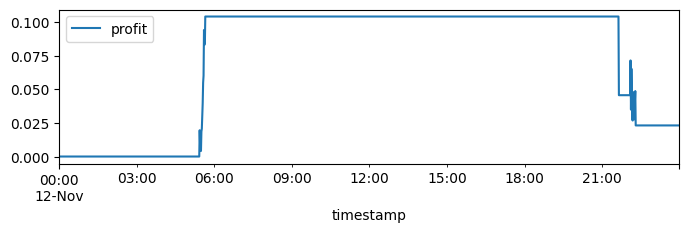

In [331]:
df_simple_reversal_trading12[['profit']].fillna(0).groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<AxesSubplot:xlabel='timestamp'>

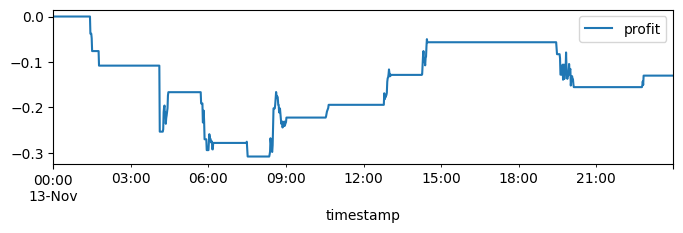

In [332]:
df_simple_reversal_trading13[['profit']].fillna(0).groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

In [341]:
importlib.reload(algo.alpha.jitter_simple_reversal.calculate)
importlib.reload(algo.alpha.jitter_simple_reversal.research)

df_simple_reversal_trading = algo.alpha.jitter_simple_reversal.research.get_dfst_trading(dfst_simple_feature, trading_param_simple_reversal)

symbol_with_jumps: 49
0 symbol: GRASS-USDT-SWAP: 31 (trading)
1 symbol: SCR-USDT-SWAP: 7 (trading)
2 symbol: X-USDT-SWAP: 86 (trading)
3 symbol: CETUS-USDT-SWAP: 31 (trading)
4 symbol: RDNT-USDT-SWAP: 8 (trading)
5 symbol: UXLINK-USDT-SWAP: 4 (trading)
6 symbol: CRO-USDT-SWAP: 21 (trading)
7 symbol: MOVR-USDT-SWAP: 25 (trading)
8 symbol: CSPR-USDT-SWAP: 158 (trading)
9 symbol: HMSTR-USDT-SWAP: 22 (trading)
10 symbol: AIDOGE-USDT-SWAP: 1 (trading)
11 symbol: BLUR-USDT-SWAP: 16 (trading)
12 symbol: GAS-USDT-SWAP: 6 (trading)
13 symbol: KISHU-USDT-SWAP: 25 (trading)
14 symbol: UNI-USDT-SWAP: 2 (trading)
15 symbol: HBAR-USDT-SWAP: 21 (trading)
16 symbol: MASK-USDT-SWAP: 14 (trading)
17 symbol: NEIRO-USDT-SWAP: 16 (trading)
18 symbol: PNUT-USDT-SWAP: 194 (trading)
19 symbol: ZENT-USDT-SWAP: 1 (trading)
20 symbol: AGLD-USDT-SWAP: 45 (trading)
21 symbol: BONK-USDT-SWAP: 1 (trading)
22 symbol: DGB-USDT-SWAP: 11 (trading)
23 symbol: JST-USDT-SWAP: 29 (trading)
24 symbol: MOODENG-USDT-SWAP: 45 (

<AxesSubplot:xlabel='timestamp'>

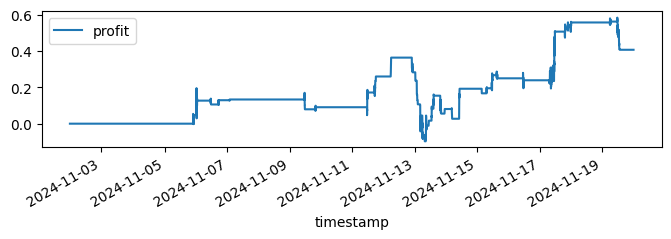

In [342]:
df_simple_reversal_trading[['profit']].fillna(0).groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<AxesSubplot:xlabel='timestamp'>

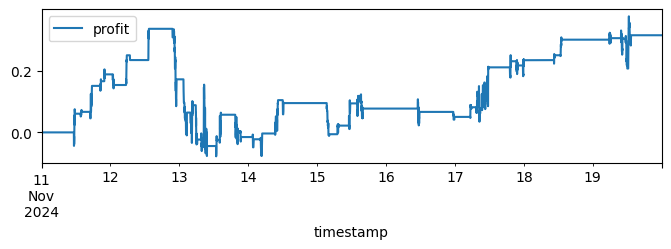

In [317]:
df_simple_reversal_trading[['profit']].fillna(0).groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<AxesSubplot:xlabel='timestamp'>

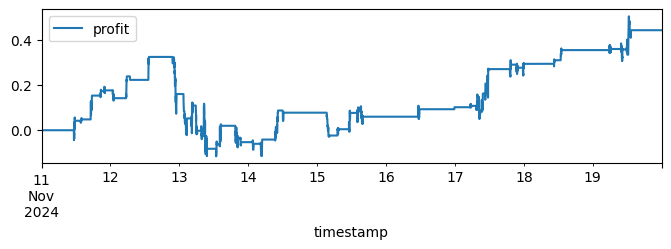

In [315]:
df_simple_reversal_trading[['profit']].fillna(0).groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<AxesSubplot:xlabel='timestamp'>

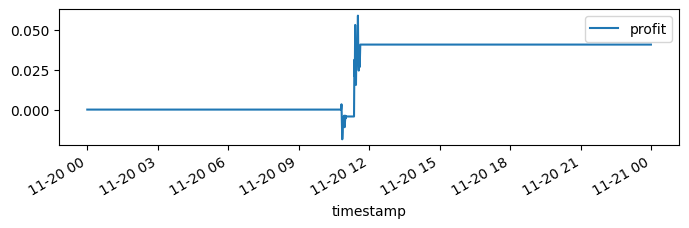

In [247]:
df_simple_reversal_trading20[['profit']].fillna(0).groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<AxesSubplot:xlabel='timestamp'>

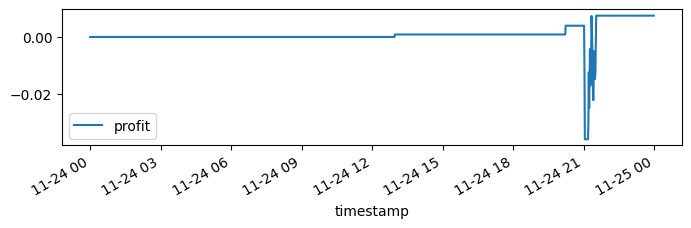

In [248]:
df_simple_reversal_trading24[['profit']].fillna(0).groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<AxesSubplot:xlabel='timestamp'>

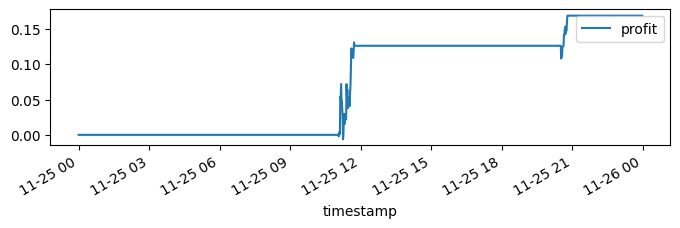

In [249]:
df_simple_reversal_trading25[['profit']].fillna(0).groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<AxesSubplot:xlabel='timestamp'>

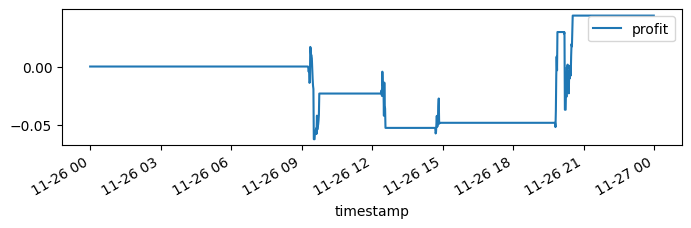

In [281]:
df_simple_reversal_trading26[['profit']].fillna(0).groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

<AxesSubplot:xlabel='timestamp'>

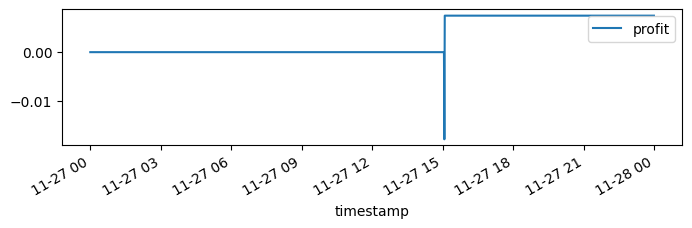

In [251]:
df_simple_reversal_trading27[['profit']].fillna(0).groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

In [333]:
df_simple_reversal_trading12[df_simple_reversal_trading12.profit.fillna(0) != 0][['profit']].groupby('symbol').sum().sort_values('profit')

,profit
symbol,
PNUT-USDT-SWAP,-0.080948
NEIRO-USDT-SWAP,0.007547
MASK-USDT-SWAP,0.096512


In [334]:
df_simple_reversal_trading13[df_simple_reversal_trading13.profit.fillna(0) != 0][['profit']].groupby('symbol').sum().sort_values('profit')

,profit
symbol,
AGLD-USDT-SWAP,-0.132731
X-USDT-SWAP,-0.045803
PNUT-USDT-SWAP,-0.031185
PEPE-USDT-SWAP,0.002739
TNSR-USDT-SWAP,0.005096
WIF-USDT-SWAP,0.071838


In [252]:
df_simple_reversal_trading20[df_simple_reversal_trading20.profit.fillna(0) != 0][['profit']].groupby('symbol').sum().sort_values('profit')

,profit
symbol,
DGB-USDT-SWAP,0.040669


In [253]:
df_simple_reversal_trading24[df_simple_reversal_trading24.profit.fillna(0) != 0][['profit']].groupby('symbol').sum().sort_values('profit')

,profit
symbol,
NOT-USDT-SWAP,0.000877
SAND-USDT-SWAP,0.003091
PUFFER-USDT-SWAP,0.003544


In [254]:
df_simple_reversal_trading25[df_simple_reversal_trading25.profit.fillna(0) != 0][['profit']].groupby('symbol').sum().sort_values('profit')

,profit
symbol,
PUFFER-USDT-SWAP,0.045602
MORPHO-USDT-SWAP,0.046038
OL-USDT-SWAP,0.077084


In [282]:
df_simple_reversal_trading26[df_simple_reversal_trading26.profit.fillna(0) != 0][['profit']].groupby('symbol').sum().sort_values('profit')

,profit
symbol,
MEMEFI-USDT-SWAP,-0.034179
MORPHO-USDT-SWAP,0.077879


In [256]:
df_simple_reversal_trading27[df_simple_reversal_trading27.profit.fillna(0) != 0][['profit']].groupby('symbol').sum().sort_values('profit')

,profit
symbol,
GFT-USDT-SWAP,0.00754


In [343]:
df_simple_reversal_trading[df_simple_reversal_trading.profit.fillna(0) != 0][['profit']].groupby('symbol').sum().sort_values('profit')

,profit
symbol,
AGLD-USDT-SWAP,-0.132731
CVX-USDT-SWAP,-0.130890
PNUT-USDT-SWAP,-0.112368
CAT-USDT-SWAP,-0.053726
MOODENG-USDT-SWAP,-0.025295
T-USDT-SWAP,-0.024625
FLOKI-USDT-SWAP,-0.020271
PEPE-USDT-SWAP,0.002739
DGB-USDT-SWAP,0.002917


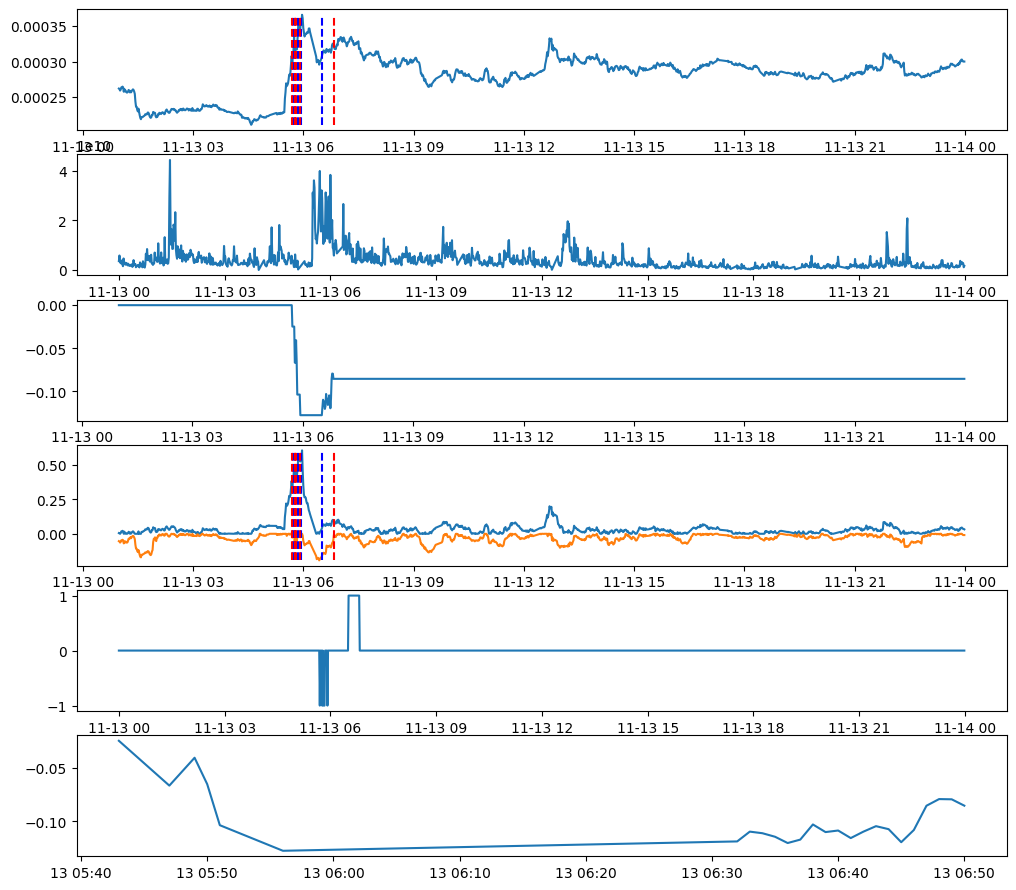

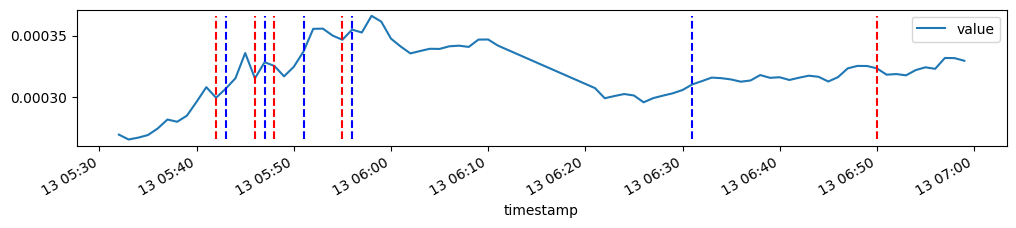

In [348]:
import algo.alpha.jitter_common.research
importlib.reload(algo.alpha.jitter_common.research)
importlib.reload(algo.alpha.jitter_simple_reversal.calculate)
importlib.reload(algo.alpha.jitter_simple_reversal.research)

symbol_investigate = 'X-USDT-SWAP'

#df = dfst_simple_feature[["close", "volume"]].reset_index().set_index("timestamp").copy()
df_sym_feature1, df_sym_trading1 = algo.alpha.jitter_common.research.investigate_symbol(
    df13.reset_index(), symbol_investigate, 
    algo.feature.simple_jitter.calculate.get_feature_df, 
    algo.alpha.jitter_simple_reversal.research.add_trading_columns, 
    trading_param_simple_reversal, figsize=(12, 11))

<AxesSubplot:xlabel='timestamp'>

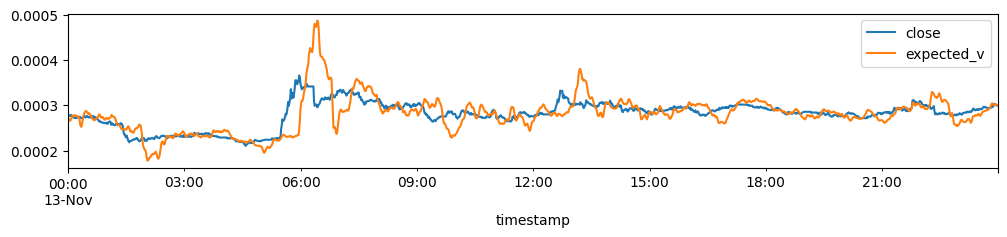

In [347]:
dfst_simple_feature13[
    dfst_simple_feature13.index.get_level_values("symbol") == symbol_investigate
][["close", 'ch_max', 'ch_min', "expected_v"]].reset_index().set_index('timestamp')[["close", "expected_v"]].plot(figsize=(12,2))

In [193]:
df_sym_trading1[
    df_sym_trading1.ch_max > trading_param.jump_threshold
][["value", 'ch_max', 'ch_min', "highest_ch_max_since_ch_max_threshold_crossed"]].reset_index().set_index('timestamp')

,value,ch_max,ch_min,highest_ch_max_since_ch_max_threshold_crossed
timestamp,,,,
2024-11-24 20:56:00-05:00,0.3599,0.222902,0.000000,0.222902
2024-11-24 20:58:00-05:00,0.3798,0.290520,0.000000,0.290520
2024-11-24 20:59:00-05:00,0.3803,0.292219,0.000000,0.292219
2024-11-24 21:00:00-05:00,0.3793,0.283587,-0.002630,0.292219
2024-11-24 21:01:00-05:00,0.3713,0.255665,-0.023666,0.292219
2024-11-24 21:02:00-05:00,0.3770,0.274941,-0.008677,0.292219
2024-11-24 21:03:00-05:00,0.3863,0.306392,0.000000,0.306392
2024-11-24 21:04:00-05:00,0.4124,0.390425,0.000000,0.390425
2024-11-24 21:05:00-05:00,0.4045,0.363330,-0.019156,0.390425
